## Detecting Domination in Wikipedia
Hypothesis: destructive domination occurs when a small number of users contribute to a disproportionate number of pages and they are not best positioned to do so

In [1]:
import os
import argparse
import numpy as np
import pandas as pd
import sys


#Preprocessing the logfile
node_folder =  'wikidata/'
timestamp_col='revtime'



In [1]:
import os
import argparse
import numpy as np
import pandas as pd
import sys
node_folder =  'wikidata/'
timestamp_col='revtime'

df_complete = pd.read_csv(node_folder + "wiki_processed_rev.csv")
df_complete['revtime'] = pd.to_datetime(df_complete['revtime'])

In [3]:
df_complete

,Unnamed: 0,username,revid,revtime,pagetitle,isReverted,revertTime,cluebotRevert,stiki_score,stiki_REP_USER,rev_username
0,0,Stacie Croquet,613181586.0,2014-06-16 19:28:02+00:00,"""Arderin""",False,-,0.0,0.000000,0.0,NaN
1,1,Foura,589076271.0,2014-01-04 02:44:19+00:00,"""Awesome""",False,-,0.0,0.025308,0.0,NaN
2,2,Hoppeduppeanut,538997683.0,2013-02-19 06:20:08+00:00,"""Awesome""",True,2013-02-19T13:37:52Z,0.0,0.118157,0.0,Foura
3,3,LiphradicusEpicus,607592946.0,2014-05-08 07:01:26+00:00,"""Cannabis afghanica""",False,-,0.0,0.000000,0.0,NaN
4,4,Stacie Croquet,619676034.0,2014-08-03 14:00:07+00:00,"""Costs Follow the Event""",False,-,0.0,0.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
572706,572706,Panzer VI-II,615806644.0,2014-07-06 11:04:40+00:00,木增,False,-,0.0,0.000000,0.0,NaN
572707,572707,Haminoon,560192944.0,2013-06-16 19:26:45+00:00,杜斌,False,-,0.0,0.000000,0.0,NaN
572708,572708,Panzer VI-II,620492869.0,2014-08-09 11:35:28+00:00,鴨志田一,False,-,0.0,0.000000,0.0,NaN
572709,572709,Reisistanssy2,620610532.0,2014-08-10 08:25:34+00:00,성재기,False,-,0.0,0.000000,0.0,NaN


In [7]:
#df_complete.to_csv(node_folder + "wiki_processed_rev.csv")

df_reverted = df_complete[df_complete.isReverted==True]
df_reverted= df_complete[df_complete['username']!=df_complete['rev_username']]

df_user_reverts =  df_reverted.groupby('rev_username')['username'].agg(['nunique'])
df_user_reverts = df_user_reverts.sort_values(['nunique'], ascending=False, kind='mergesort')
df_user_reverts.to_csv(node_folder + "wiki_revert_users.csv")


In [14]:
#get hte names of users whose data got reverted and the pages
# store the list of top 100 users who made the reverts
revert_user_list = list(df_user_reverts.index.unique())
min_rev_list =revert_user_list[:200]


Populating the interactive namespace from numpy and matplotlib


Calculating best minimal value for power law fit


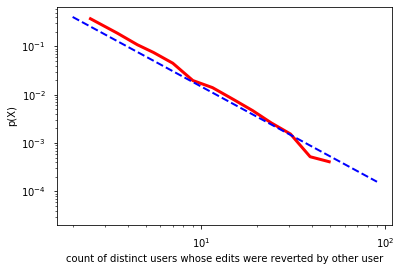

In [4]:
from numpy import genfromtxt
import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'
#pylab.rcParams['font.sans-serif']='Arial'

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)


from matplotlib.font_manager import FontProperties

panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

words = genfromtxt('wikidata/reverted_user_data.txt')


%pylab inline
import powerlaw


data = words

fit = powerlaw.Fit(data, discrete=True)
#print(fit.)
####
figCCDF = fit.plot_pdf(color='r', linewidth=3, label="Pages edited count fit")
fit.power_law.plot_pdf(color='b', linestyle='--', linewidth=2,label="Power law fit",  ax=figCCDF)
#fit.plot_ccdf(color='r', linewidth=2, ax=figCCDF)
#fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF)
####
figCCDF.set_ylabel(u"p(X)")
figCCDF.set_xlabel(r"count of distinct users whose edits were reverted by other user")
#handles, labels = fig.get_legend_handles_labels()
#figCCDF.legend(handles, labels, loc=2)

figname = 'FigCCDF'
savefig(figname+'.eps', bbox_inches='tight')

Calculating best minimal value for power law fit
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


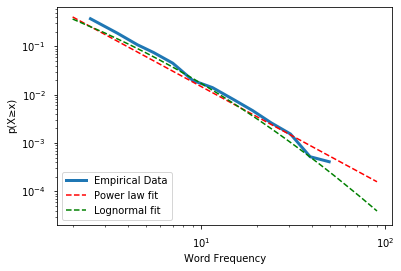

In [28]:
data = words
fit = powerlaw.Fit(data, discrete=True)
####
fit.distribution_compare('power_law', 'lognormal')
fig = fit.plot_pdf(linewidth=3, label='Empirical Data')
fit.power_law.plot_pdf(ax=fig, color='r', linestyle='--', label='Power law fit')
fit.lognormal.plot_pdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
####
fig.set_ylabel(u"p(X≥x)")
fig.set_xlabel("Word Frequency")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)

figname = 'FigLognormal'
savefig(figname+'.eps', bbox_inches='tight')

In [19]:
#get the page name having the top reverted users
print(len(df_reverted.pagetitle.unique()))
df_reverted_pages = df_reverted[df_reverted.rev_username.isin(min_rev_list)]
print(len(df_reverted_pages.pagetitle.unique()))
page_list = df_reverted_pages.pagetitle.unique()

164888
4096


In [23]:
# get the pages with from the data
df_main_pages = df_complete[df_complete.pagetitle.isin(page_list)]
print(df_main_pages.shape)

#get the original stiki score
df_page_score = df_main_pages.groupby('pagetitle')['stiki_score'].agg(['mean', 'median'])

# get all reverts where the reverted user was in this top 200 list and then get the stiki score.
df_score_reverts = df_main_pages[(df_main_pages['rev_username'].isin(min_rev_list) & df_main_pages['isReverted']==True)]
df_score_reverts

(39070, 11)


,Unnamed: 0,username,revid,revtime,pagetitle,isReverted,revertTime,cluebotRevert,stiki_score,stiki_REP_USER,rev_username
4154,4154,LogFTW,584476226.0,2013-12-04 04:55:08+00:00,2006 Lebanon War,True,2013-12-04T05:20:09Z,0.0,0.143810,0.000000,Je.est.un.autre
4708,4708,HMSLavender,612835398.0,2014-06-14 01:07:28+00:00,2010 FIFA World Cup Final,True,2014-06-14T01:08:51Z,0.0,0.025308,0.000000,HMSLavender
5291,5291,ProKro,573696726.0,2013-09-19 20:52:53+00:00,2012,True,2013-09-19T20:53:22Z,0.0,0.169665,0.000000,ProKro
5292,5292,Glenmeister,568654308.0,2013-08-15 13:29:13+00:00,2012,True,2013-08-15T21:04:24Z,0.0,0.053051,0.000000,ProKro
5296,5296,Theroux721,619634799.0,2014-08-03 05:29:05+00:00,2012 (film),True,2014-08-03T06:15:51Z,0.0,0.106120,0.000000,A Great Catholic Person
...,...,...,...,...,...,...,...,...,...,...,...
571558,571558,Pedrobee,547313105.0,2013-03-27 18:54:10+00:00,Zambia,True,2013-03-27T18:56:40Z,0.0,0.316479,0.000000,Blondeguynative
571608,571608,Miss.Indecisive,592291295.0,2014-01-25 07:19:53+00:00,Zara Phillips,True,2014-01-25T08:46:34Z,0.0,0.031646,0.000000,Miss.Indecisive
571682,571682,Pablogarciadaz,563272381.0,2013-07-07 19:05:21+00:00,Zedd (musician),True,2013-07-07T19:28:46Z,0.0,0.127305,0.660806,Justasaddream
571896,571896,Patbdwll,601656602.0,2014-03-28 14:14:10+00:00,Ziaur Rahman,True,2014-03-28T14:16:37Z,0.0,0.084247,0.000000,Patbdwll


In [25]:
df_score_reverts = df_score_reverts.groupby('pagetitle')['stiki_score'].agg(['mean', 'median'])
df_score_reverts.rename(columns={'mean':'mean_rev_score', 'median':'median_rev_score'}, inplace=True)

df_final = df_page_score.merge(df_score_reverts, on='pagetitle', how='left')
df_final

,mean,median,mean_rev_score,median_rev_score
pagetitle,,,,
(I Just) Died in Your Arms,0.087728,0.087728,NaN,NaN
113th United States Congress,0.053864,0.037712,NaN,NaN
12 Years a Slave (film),0.053561,0.050980,NaN,NaN
13 Sins,0.055724,0.050980,NaN,NaN
16th Street Baptist Church bombing,0.143999,0.143999,NaN,NaN
...,...,...,...,...
Zimbabwe,0.194667,0.137051,NaN,NaN
Zombie (fictional),0.154235,0.243608,0.243608,0.243608
Zynga,0.094975,0.053051,NaN,NaN


In [26]:
df_final.to_csv(node_folder + "wiki_hypothesis3.csv")